In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

plt.style.use('ggplot')

from drive.MyDrive.Kaggle.Clustering_072022.src.functions import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
config = yaml.load(open('drive/MyDrive/Kaggle/Clustering_072022/src/config.YAML', 'rb'))

In [6]:
data = pd.read_csv(config['path'] + 'src/data.csv', index_col='id')

# Basic Exploration
- take a peak
- data types
- missing values
- basic stats (mean, IQR, std, min, max)
- unique values

In [ ]:
data.head(20).T

id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
f_00,-0.389420,-0.689249,0.809079,-0.500923,-0.671268,-0.888945,-0.096137,-0.908615,0.997730,-0.641308,1.062159,-0.326783,-0.623781,-1.380010,-0.192652,-1.783367,-0.800112,-0.752238,0.351555,-1.290764
f_01,-0.912791,-0.453954,0.324568,0.229049,-1.039533,-1.121026,-0.247528,0.065319,-1.153765,0.376707,-0.396084,-0.968130,-1.876162,0.923588,-1.295226,-0.438485,0.964449,0.513144,-2.335233,0.066503
f_02,0.648951,0.654175,-1.170602,0.264109,-0.270155,0.988608,-0.642176,-0.427002,-0.908964,-0.427771,-1.220709,1.156120,-1.676969,0.688615,1.023619,-1.350500,0.770030,-0.932495,0.285044,0.006886
f_03,0.589045,0.995248,-0.624491,0.231520,-1.830264,0.224778,-0.534849,-0.392070,0.984962,0.802239,-0.821185,-0.960176,0.120796,1.078770,-1.101477,-0.393065,-1.327953,0.691289,-0.344875,-0.884453
f_04,-0.830817,-1.653020,0.105448,0.415012,-0.290108,1.655074,1.051045,1.135532,1.176252,-1.049559,-0.402880,-1.098746,0.051265,-1.711858,1.223792,0.926347,0.457608,-1.149812,0.234666,0.936633
f_05,0.733624,0.863810,0.783948,-1.221269,-1.852809,-1.274271,0.257412,0.797638,-0.061570,-0.215596,-0.784123,0.139819,-0.947185,0.892796,-1.568216,0.720929,0.001898,-2.455670,1.538827,0.232279
f_06,2.258560,-0.090651,1.988301,0.138850,0.781898,0.371443,-2.129200,-0.510480,-1.015247,-1.277036,-1.721263,0.402527,-0.116048,-0.023469,0.317962,0.731985,-0.630234,-1.432307,-1.802833,-0.599151
f_07,2.000000,2.000000,5.000000,6.000000,8.000000,4.000000,2.000000,2.000000,1.000000,1.000000,8.000000,4.000000,4.000000,4.000000,16.000000,3.000000,2.000000,4.000000,7.000000,11.000000
f_08,13.000000,3.000000,11.000000,2.000000,7.000000,1.000000,2.000000,8.000000,4.000000,15.000000,6.000000,11.000000,7.000000,5.000000,7.000000,7.000000,3.000000,10.000000,2.000000,6.000000
f_09,14.000000,6.000000,5.000000,13.000000,5.000000,1.000000,17.000000,5.000000,4.000000,1.000000,5.000000,4.000000,5.000000,12.000000,4.000000,9.000000,21.000000,5.000000,11.000000,6.000000


In [ ]:
stats = data.describe().T
stats['dtype'] = data.dtypes.values
stats['missing_values'] = data.isnull().sum().T
stats['unique_values'] = data.nunique()
stats

,count,mean,std,min,25%,50%,75%,max,dtype,missing_values,unique_values
f_00,98000.0,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521,float64,0,98000
f_01,98000.0,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974,float64,0,98000
f_02,98000.0,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247,float64,0,98000
f_03,98000.0,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373,float64,0,98000
f_04,98000.0,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549,float64,0,98000
f_05,98000.0,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316,float64,0,98000
f_06,98000.0,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595,float64,0,98000
f_07,98000.0,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000,int64,0,32
f_08,98000.0,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000,int64,0,29
f_09,98000.0,8.193163,5.904919,0.000000,4.000000,7.000000,11.000000,44.000000,int64,0,45


In [ ]:
data.duplicated().sum()

0

In [ ]:
cat_feats = data.dtypes[data.dtypes == 'int64'].index.tolist()
cont_feats = data.dtypes[data.dtypes != 'int64'].index.tolist()

## Overview
- No missing values this month :)
- Two data types again where the int types are categorical features
- Cont data have a similar range (-5, 5) and mean/median of 0 and std of 1

# Plots

## Histograms

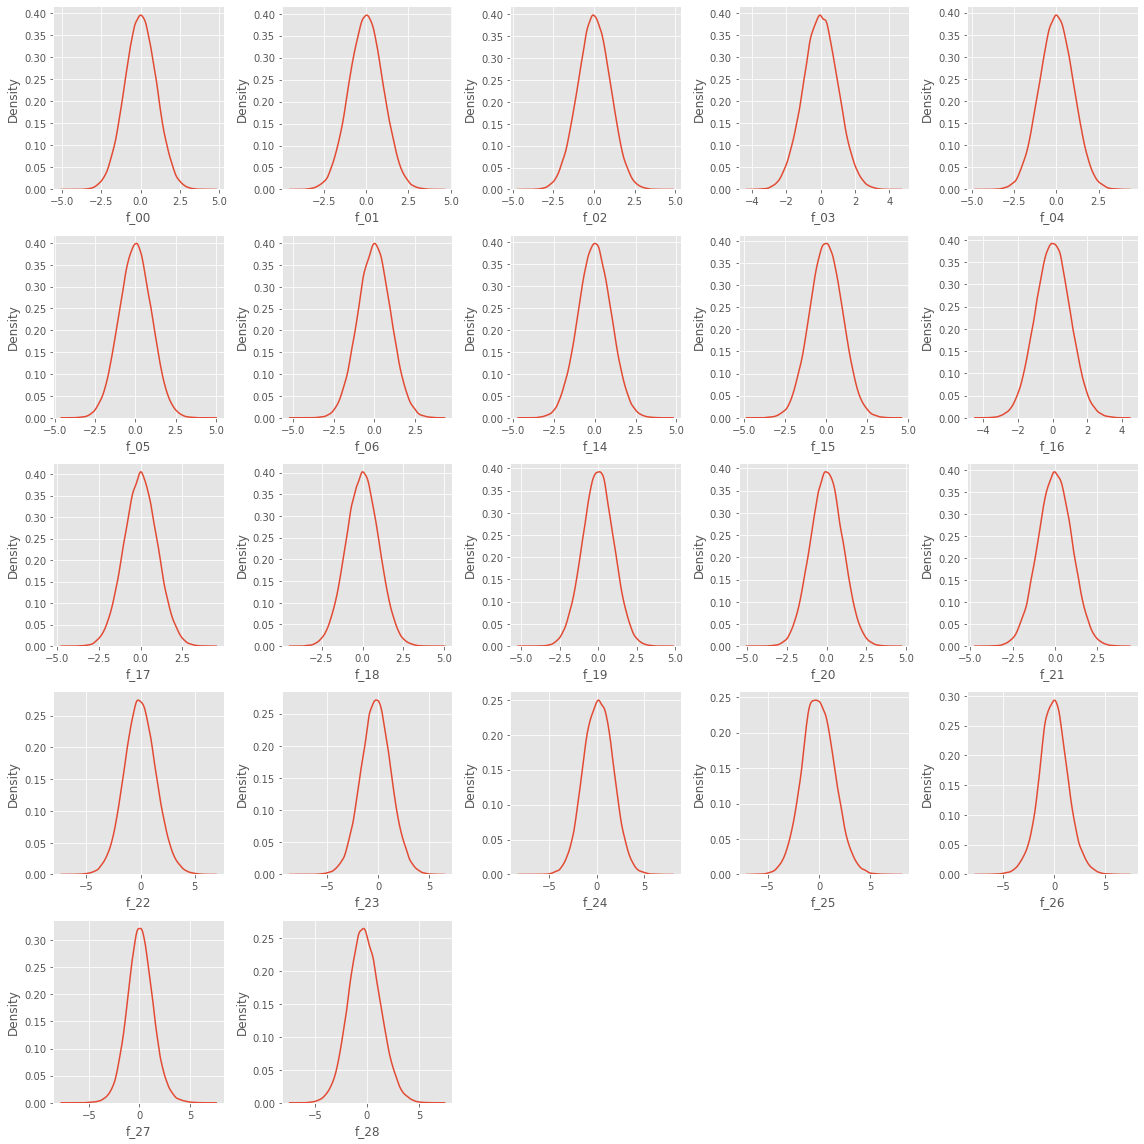

In [ ]:
clf_plot_distributions(data, cont_feats, hue='target', ncols=5, method='hist')

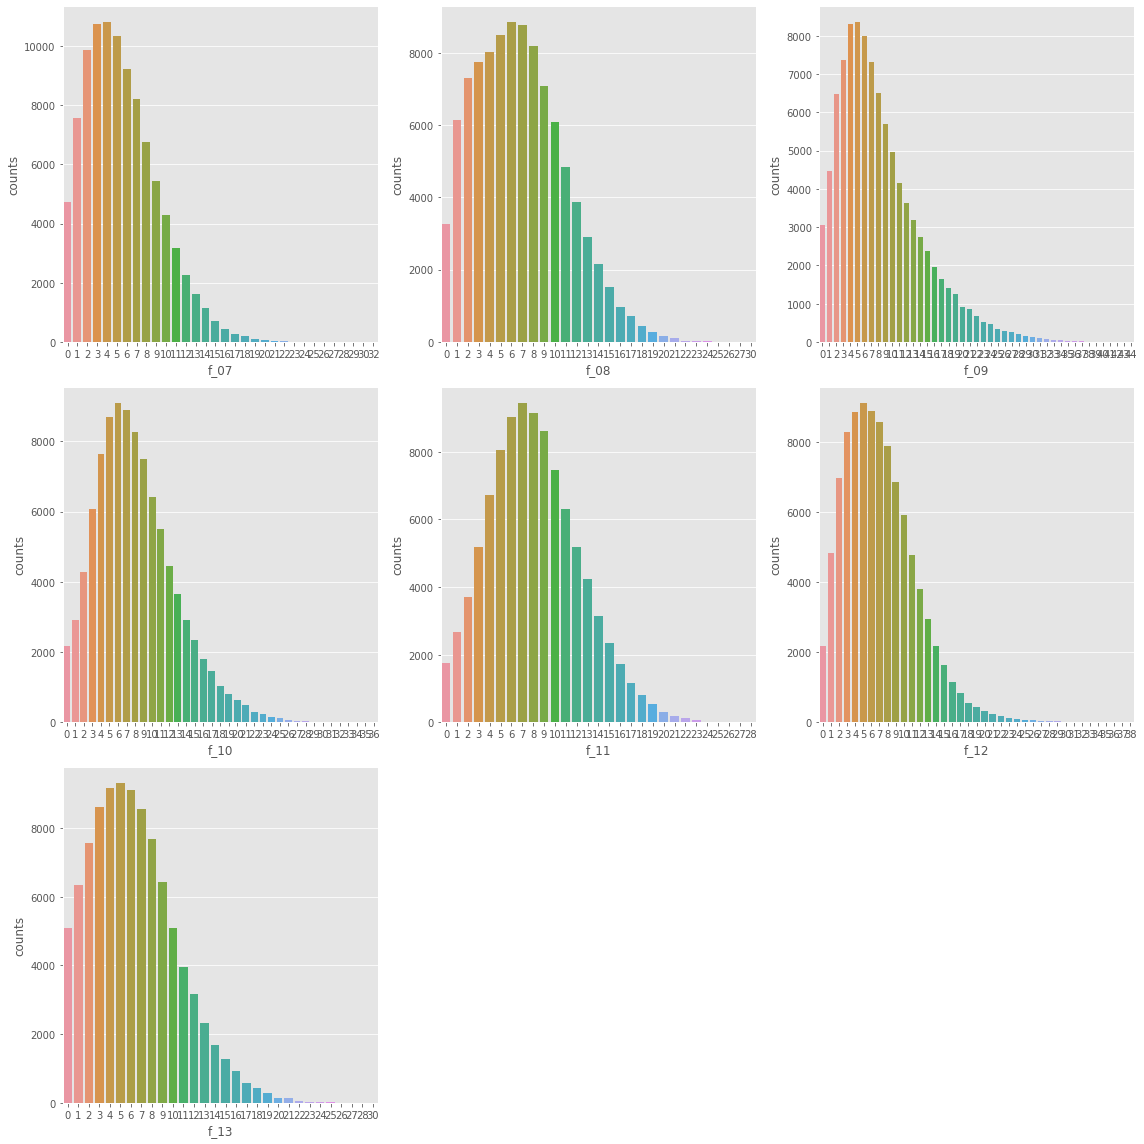

In [ ]:
clf_plot_distributions(data, cat_feats, hue='target', ncols=3, method='bar')

## Box Plots

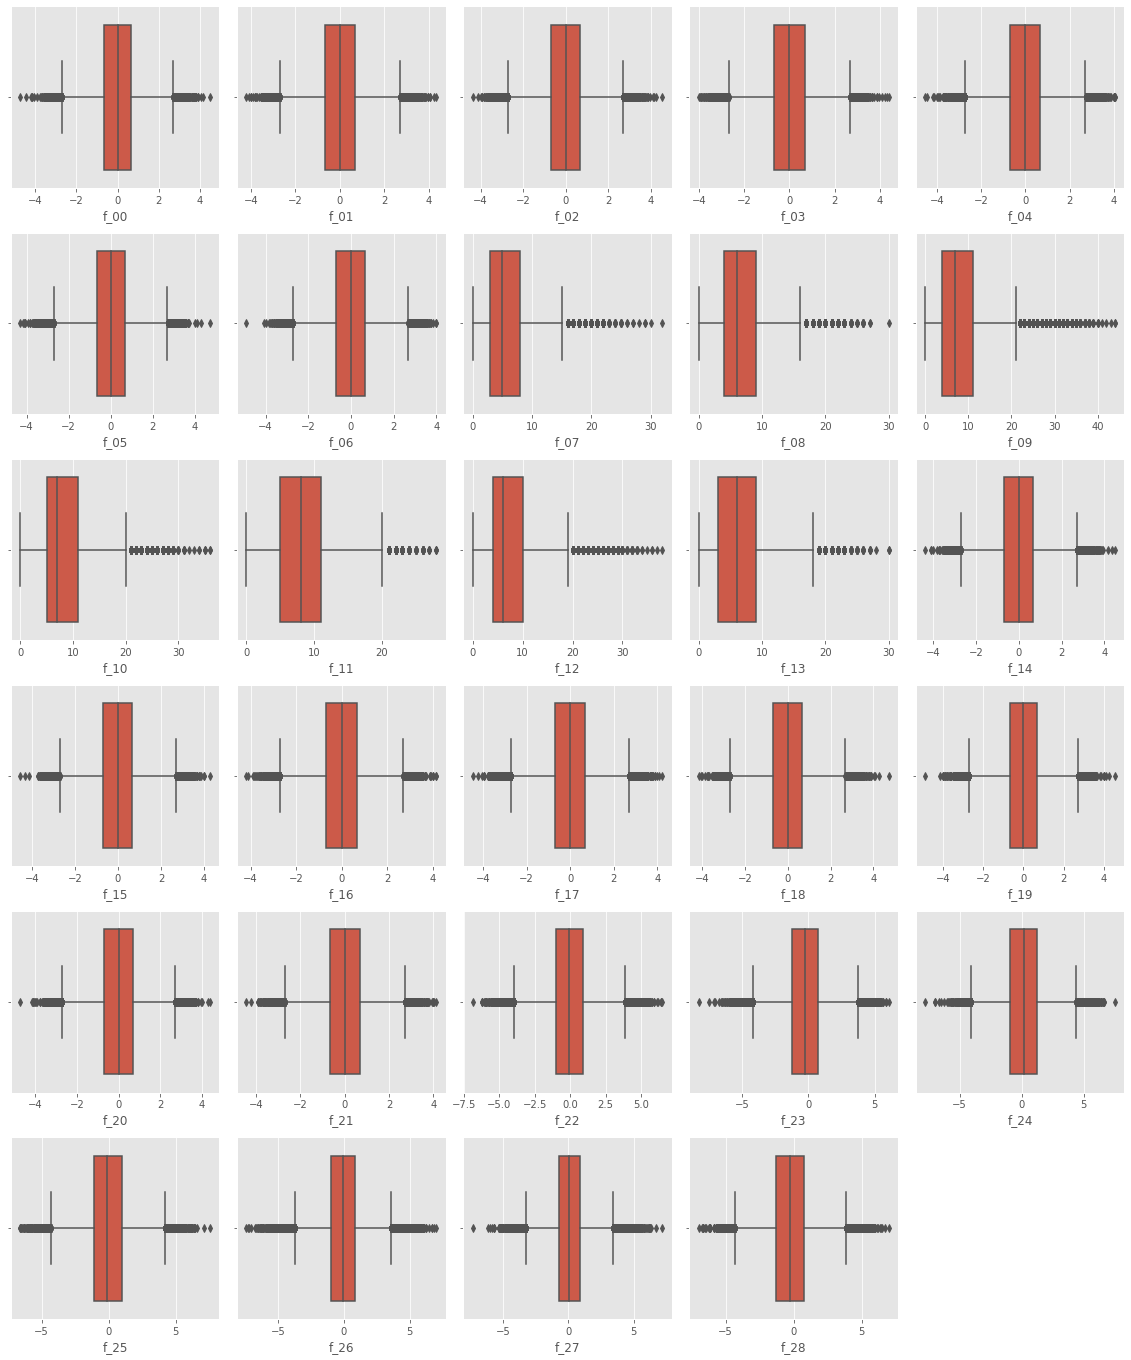

In [ ]:
clf_plot_distributions(data, data.columns, ncols=5, method='box')

- The integer data is skewed to the right. A power transformation may help, as well as scaling as the range is much higher than the floats
- The cont features contain outliers. Robost scaler may solver outlier and scale problem together.

Text(0.5, 1.0, 'Correlations')

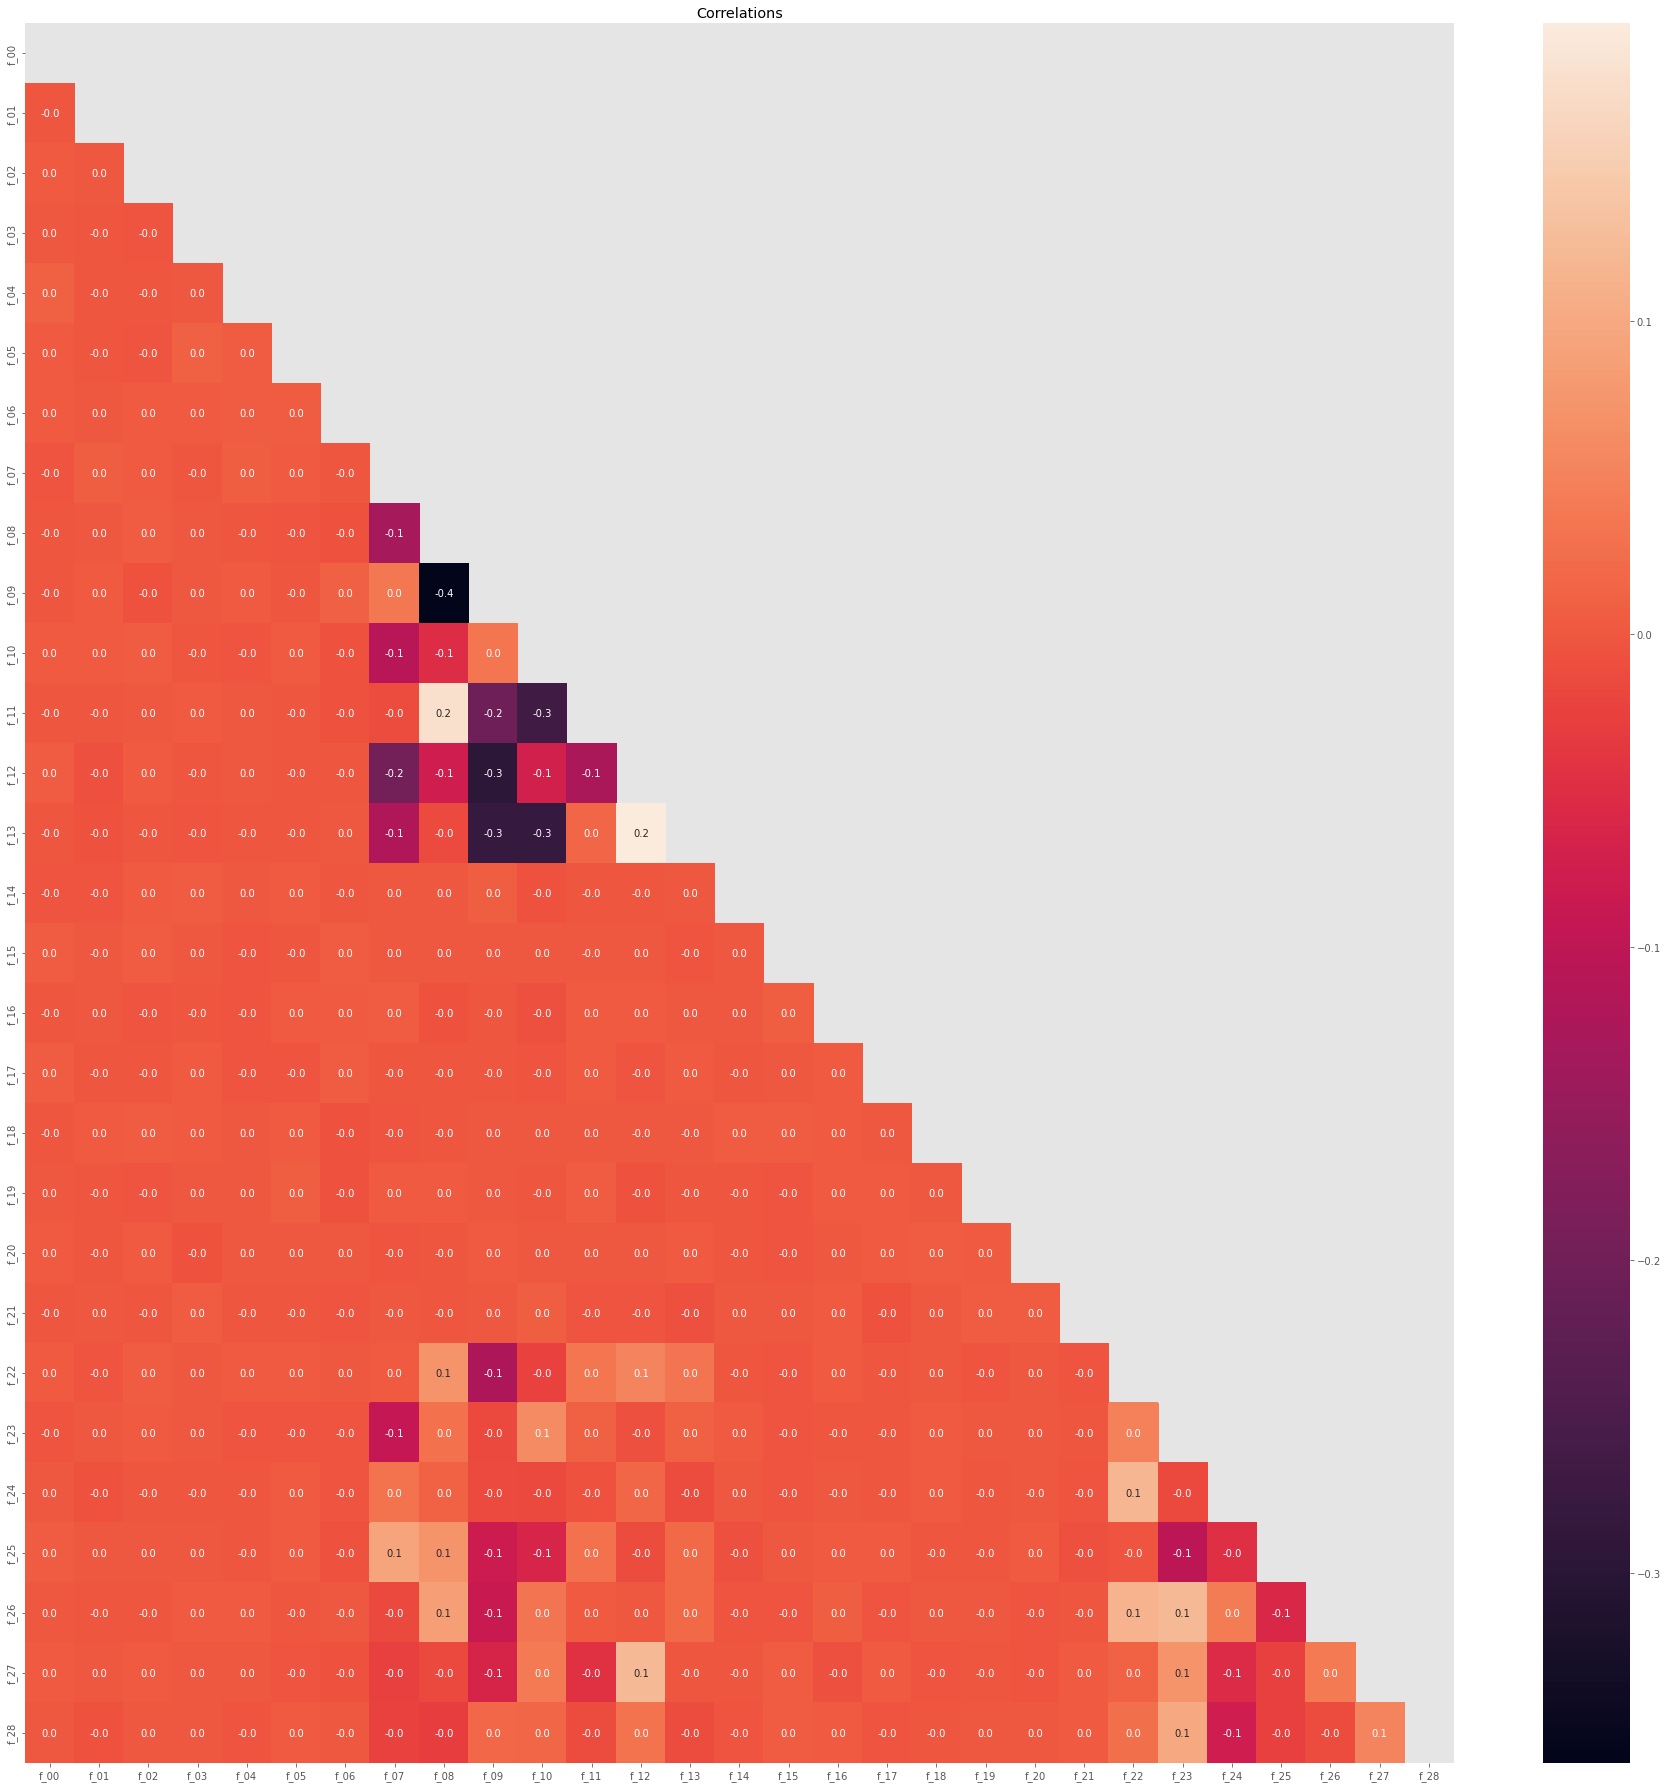

In [ ]:
corr = data.corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(32, 32))
sns.heatmap(corr,  xticklabels=corr.columns, yticklabels=corr.columns, annot=True, mask=matrix, ax=ax, fmt='.1f');
ax.set_title('Correlations')

- The strongest correlation is within the categorical variables, there is also a weaker correlation between F_22 to F_27
- There is a weak corelation between these two groups as well


# Shapiro Normality Test

In [7]:
for col in data.columns:
    stat, p_value = shapiro(data[col])
    if p_value >= 0.05:
        result = 'null hypothosis accepted: significant evidence feature is normal'
    else:
        result = 'null hypothesis rejected: significant evidence feature is not normal'
    print(f'Feature: {col} result: {result}')

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Feature: f_00 result: null hypothosis accepted: significant evidence feature is normal
Feature: f_01 result: null hypothosis accepted: significant evidence feature is normal
Feature: f_02 result: null hypothosis accepted: significant evidence feature is normal
Feature: f_03 result: null hypothosis accepted: significant evidence feature is normal
Feature: f_04 result: null hypothosis accepted: significant evidence feature is normal
Feature: f_05 result: null hypothosis accepted: significant evidence feature is normal
Feature: f_06 result: null hypothosis accepted: significant evidence feature is normal
Feature: f_07 result: null hypothesis rejected: significant evidence feature is not normal
Feature: f_08 result: null hypothesis rejected: significant evidence feature is not normal
Feature: f_09 result: null hypothesis rejected: significant evidence feature is not normal
Feature: f_10 result: null hypothesis rejected: significant evidence feature is not normal
Feature: f_11 result: null 

# Conclusion
- Two data types, int64 and float64, representing discrete ordinal data and continuous data
- The continuous data is either normally distributed and standardized or not normal nor standardized. This was qualitatively deduced from the histograms, boxplots, mean & std and quantitatively through the shapiro-wilkinson test for normality. 
- There is evidence nearly all features contain outliers.
- Discrete data is skewed and has a much larger range
- Weak correlation in the discrete data, non-standardized continuous data and between these groups.
- Now lets do some clustering!